In [1]:
from google.colab import files
upload=files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv
Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [122]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [235]:
# For Data
import pandas as pd
import numpy as np
import os

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
from wordcloud import WordCloud
import re

# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import defaultdict, Counter


# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# For Styling
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

In [51]:
data_corona_NLP_test = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin-1')
data_corona_NLP_train = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin-1')

In [217]:
original_train_data = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin-1')

In [52]:
data_corona_NLP_test.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [53]:
data_corona_NLP_train.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [54]:
print('Shape of test =', data_corona_NLP_test.shape, '\nShape of train =',data_corona_NLP_train.shape)

Shape of test = (3798, 6) 
Shape of train = (41157, 6)


In [55]:
data_corona_NLP_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [56]:
data_corona_NLP_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [57]:
data_corona_NLP_test.describe()

UserName    ScreenName
count  3798.000000   3798.000000
mean   1899.500000  46851.500000
std    1096.532489   1096.532489
min       1.000000  44953.000000
25%     950.250000  45902.250000
50%    1899.500000  46851.500000
75%    2848.750000  47800.750000
max    3798.000000  48750.000000

In [58]:
data_corona_NLP_train.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

In [59]:
# Sentiment Analysis
print(data_corona_NLP_test.Sentiment.value_counts())
print('-'*30, '\n', data_corona_NLP_train.Sentiment.value_counts())

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64
------------------------------ 
 Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


Text(0.5, 1.0, 'Test Sentiment Analysis')

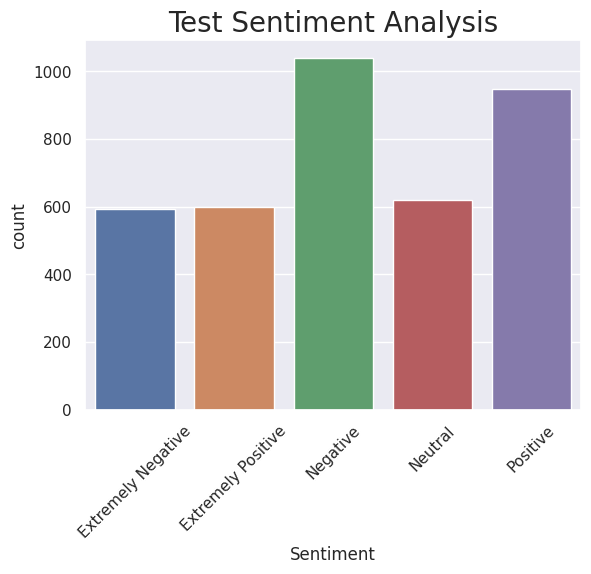

In [60]:
# Sentiment Analysis
sns.set_theme(style="darkgrid")
sns.countplot(x = data_corona_NLP_test['Sentiment'].sort_values())
plt.xticks(rotation=45)
plt.title("Test Sentiment Analysis",fontsize=20)

Text(0.5, 1.0, 'Train Sentiment Analysis ')

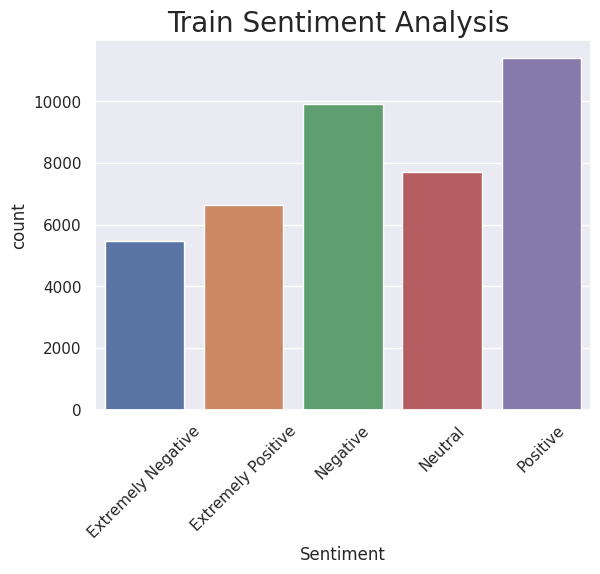

In [61]:
sns.set_theme(style="darkgrid")
sns.countplot(x = data_corona_NLP_train['Sentiment'].sort_values())
plt.xticks(rotation=45)
plt.title("Train Sentiment Analysis ",fontsize=20)

In [62]:
# Convert 5-sentiment catagories into 3 catagories
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

In [63]:
data_corona_NLP_test['Sentiment']=data_corona_NLP_test['Sentiment'].apply(lambda x:change_sen(x))
data_corona_NLP_train['Sentiment']=data_corona_NLP_train['Sentiment'].apply(lambda x:change_sen(x))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


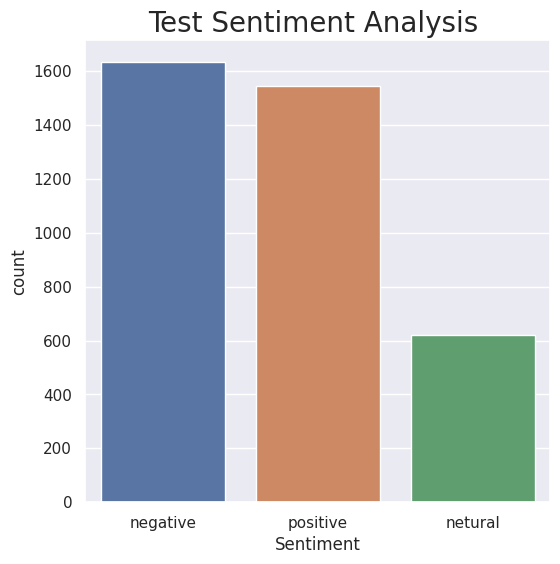

In [64]:
plt.figure(figsize=(6,6))
plt.title("Test Sentiment Analysis ",fontsize=20)
sns.countplot(data_corona_NLP_test['Sentiment']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


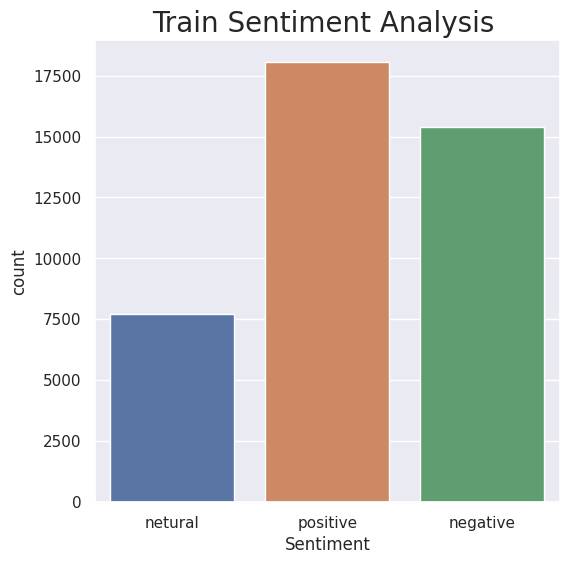

In [72]:
plt.figure(figsize=(6,6))
plt.title("Train Sentiment Analysis ",fontsize=20)
sns.countplot(data_corona_NLP_train['Sentiment']);

In [66]:
# Null Values
data_corona_NLP_test.isnull().sum().sort_values(ascending=False)

Location         834
UserName           0
ScreenName         0
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [67]:
data_corona_NLP_train.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [68]:
# % of Missing Values
test_missing_values = pd.concat([data_corona_NLP_test.isnull().sum(), 100 * data_corona_NLP_test.isnull().mean()], axis=1).sort_values(0, ascending=True)
test_missing_values.columns=['Count', '% of Missing Values']
test_missing_values

Count  % of Missing Values
UserName           0             0.000000
ScreenName         0             0.000000
TweetAt            0             0.000000
OriginalTweet      0             0.000000
Sentiment          0             0.000000
Location         834            21.958926

In [95]:
# Duplicate rows
data_corona_NLP_train[data_corona_NLP_train.duplicated()]

Empty DataFrame
Columns: [UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment, text]
Index: []

Text(0.5, 1.0, 'Missing values of each columns in Test')

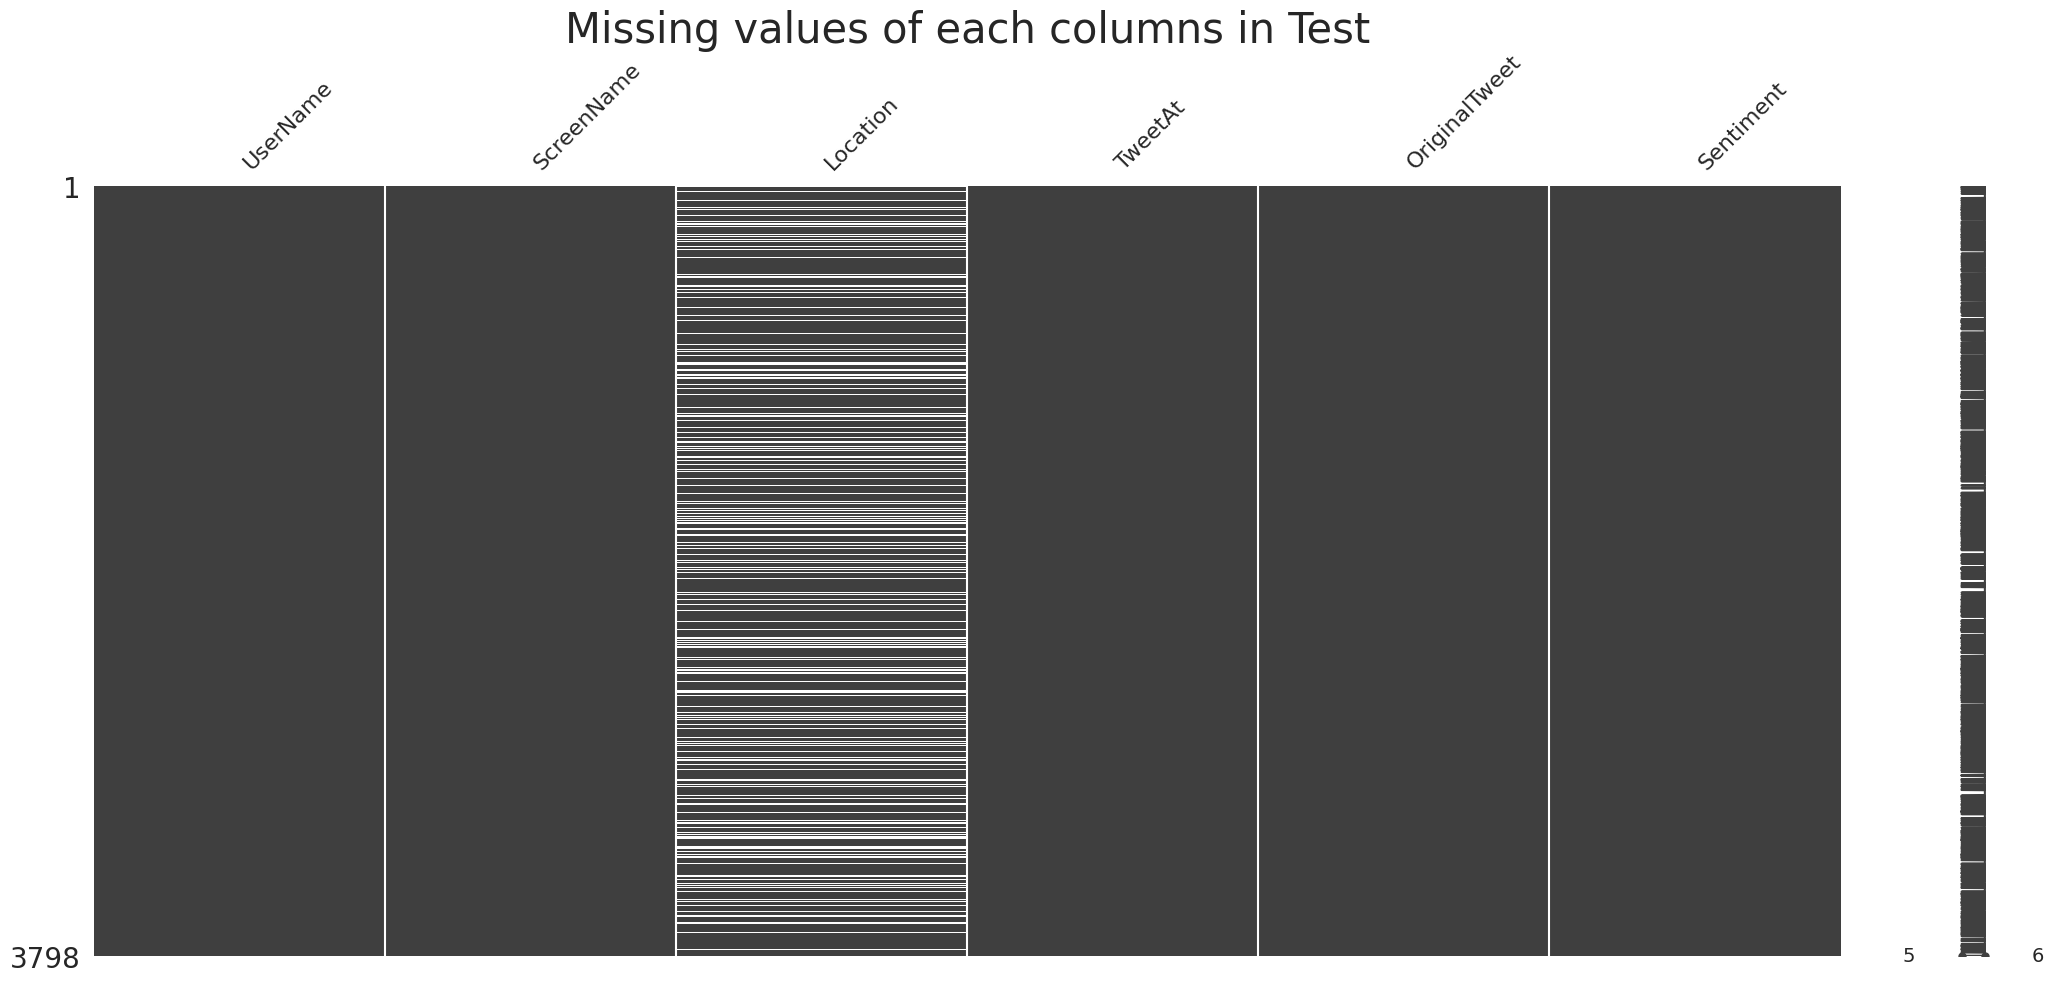

In [69]:
msno.matrix(data_corona_NLP_test)
plt.title('Missing values of each columns in Test', fontsize=30)

In [70]:
train_missing_values = pd.concat([data_corona_NLP_train.isnull().sum(), 100 * data_corona_NLP_train.isnull().mean()], axis=1).sort_values(0, ascending=True)
train_missing_values.columns=['Count', '% of Missing Values']
train_missing_values

Count  % of Missing Values
UserName           0             0.000000
ScreenName         0             0.000000
TweetAt            0             0.000000
OriginalTweet      0             0.000000
Sentiment          0             0.000000
Location        8590            20.871298

Text(0.5, 1.0, 'Missing values of each columns in Train')

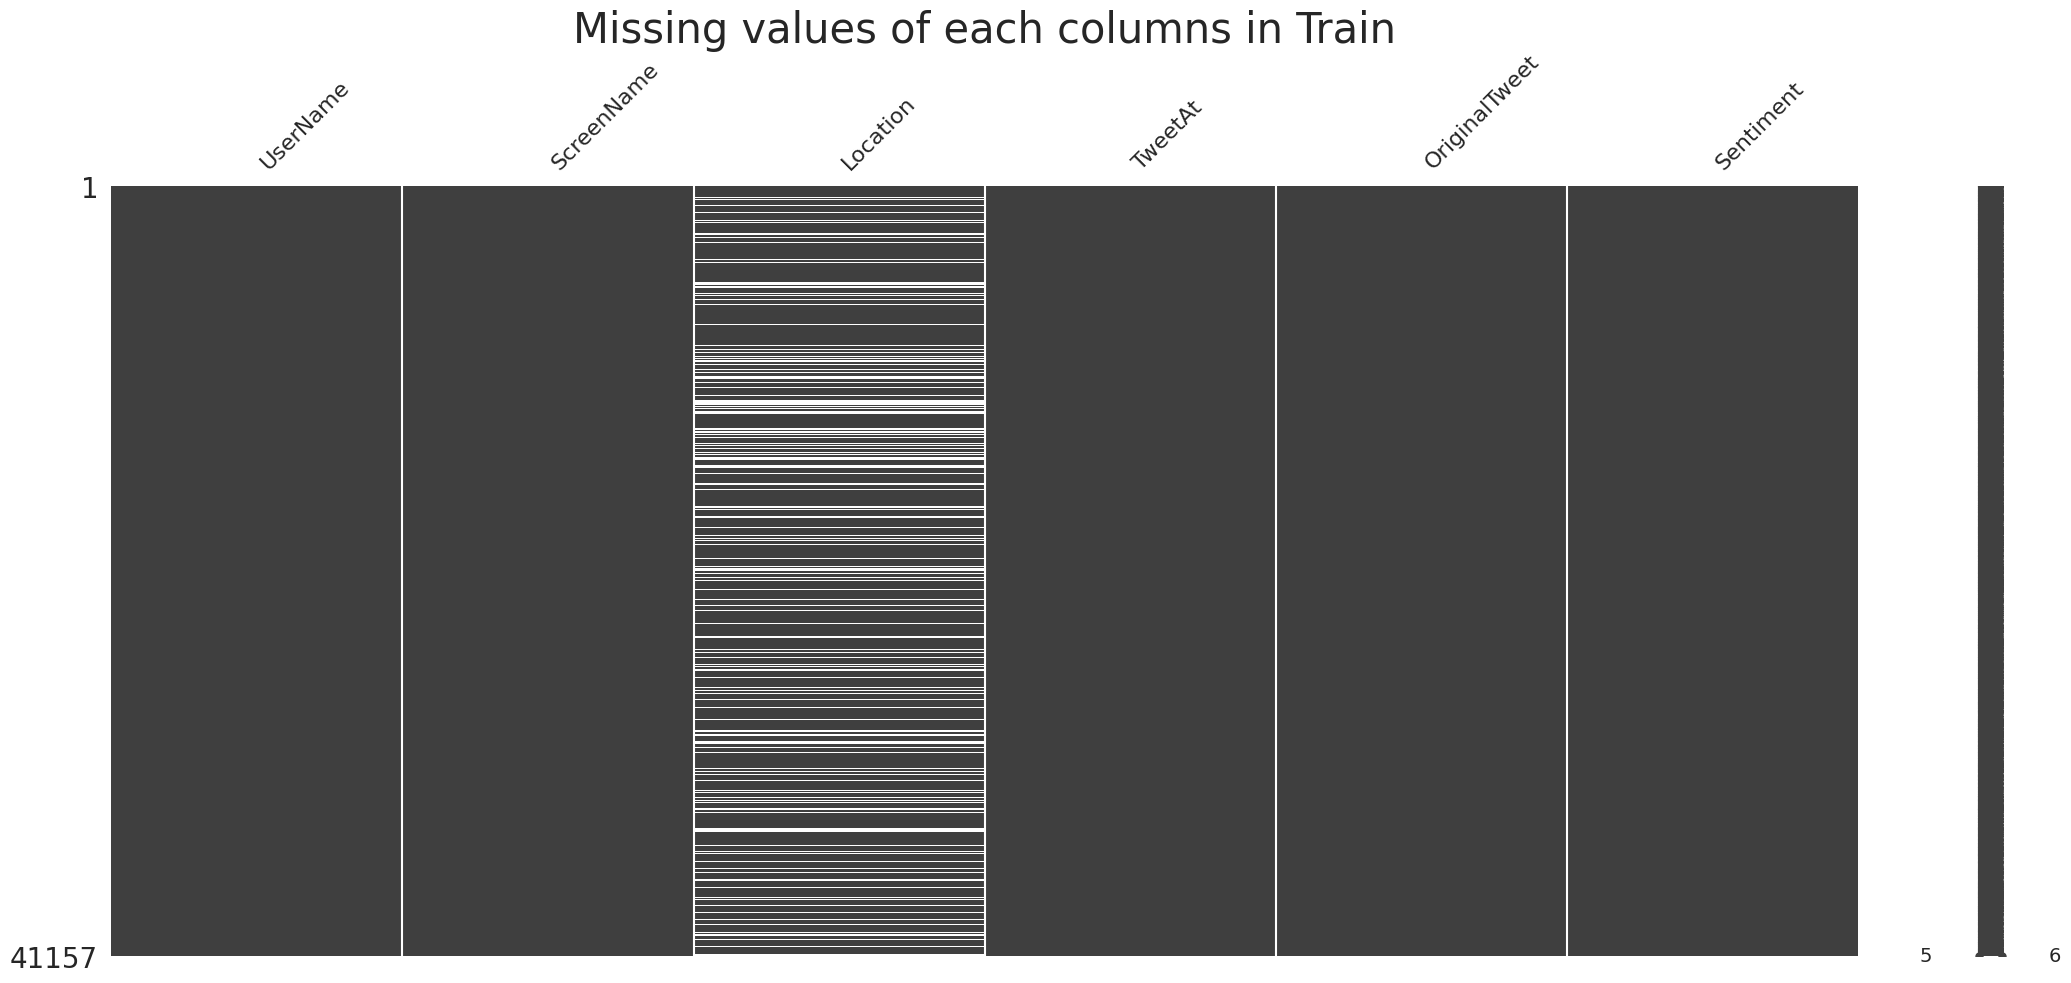

In [71]:
msno.matrix(data_corona_NLP_train)
plt.title('Missing values of each columns in Train', fontsize=30)

In [51]:
#num_tweet = []

# calculate number of tweets on each day
#for date in data_corona_NLP_test.TweetAt:
#    num_tweet.append(date)

In [186]:
# Tweets Timeline
time = data_corona_NLP_train.groupby(['TweetAt']).size()

In [212]:
fig = px.line(data_corona_NLP_train, 
              x=time.index, 
              y=time.values, 
              title = 'Tweets Timeline',
              template='simple_white')

fig.update_layout(font=dict(size=17,family="Times New Roman"), xaxis_title="Date", yaxis_title="Number of Tweets")
fig.show()

In [210]:
# Top 10 Tweets Location
location = data_corona_NLP_train['Location'].value_counts()[:10]
fig = px.bar(x=location.index,y=location.values,text=location.values,
       color = location.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Distribution of Top 10 Locations',
        template = 'simple_white')

fig.update_layout(font=dict(size=20,family="Times New Roman"), xaxis_title="Date", yaxis_title="Number of Tweets")

#fig.update_traces(xaxis_title="Date", yaxis_title="Number of Tweets",textposition='inside',
#                  textfont_size=11)
fig.show()

In [152]:
data_corona_NLP_train['text'] = data_corona_NLP_train["OriginalTweet"]
data_corona_NLP_train["text"] = data_corona_NLP_train["text"].astype(str)

target = data_corona_NLP_train.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
target.style.background_gradient(cmap='pink')

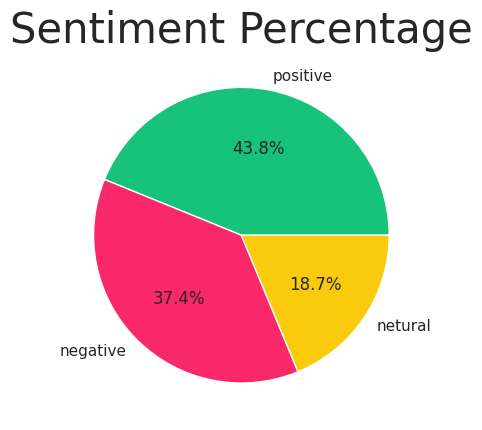

In [91]:
percent_target = target['text']
labels = target['Sentiment']
plt.title('Sentiment Percentage', fontsize=30)
colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_target, radius = 1, labels=labels, colors=colors, autopct="%.1f%%")

plt.setp(my_pie, width=1.0, edgecolor='white') 
plt.show()

In [94]:
fig = make_subplots(1,2,subplot_titles=('Train','Test'))
x = data_corona_NLP_train['Sentiment'].value_counts()

fig.add_trace(go.Bar(x=x.index, y=x.values, marker_color=['#17C37B','#F92969','#FACA0C'], name='train'), row=1, col=1)
x = data_corona_NLP_test['Sentiment'].value_counts()

fig.add_trace(go.Bar(x=x.index, y=x.values, marker_color=['#17C37B','#F92969','#FACA0C'], name='test'), row=1, col=2)

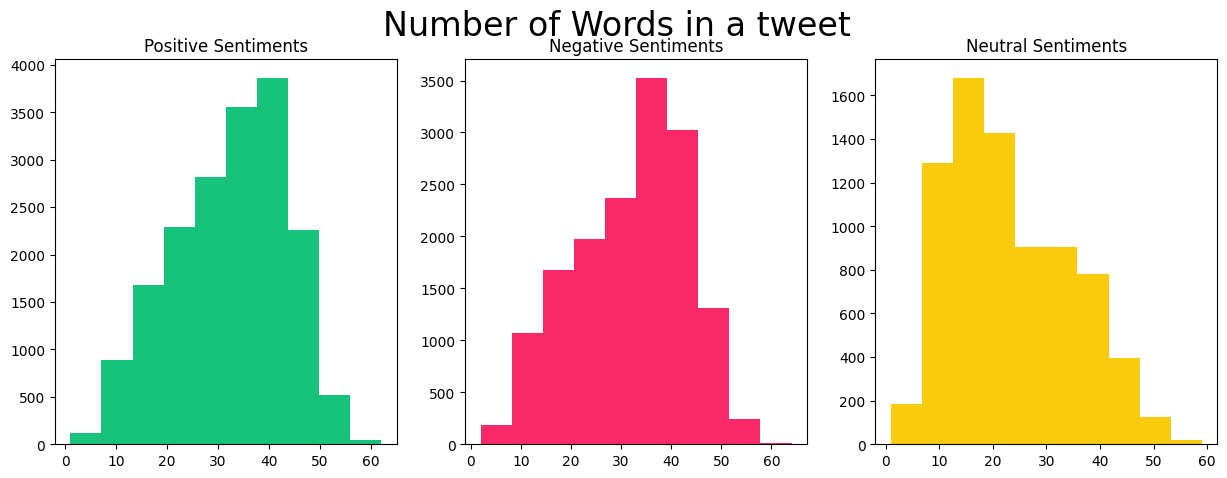

In [98]:
# No of words in a tweet

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="positive"]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="negative"]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="netural"]['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Number of Words in a tweet', fontsize = 24)
plt.show()

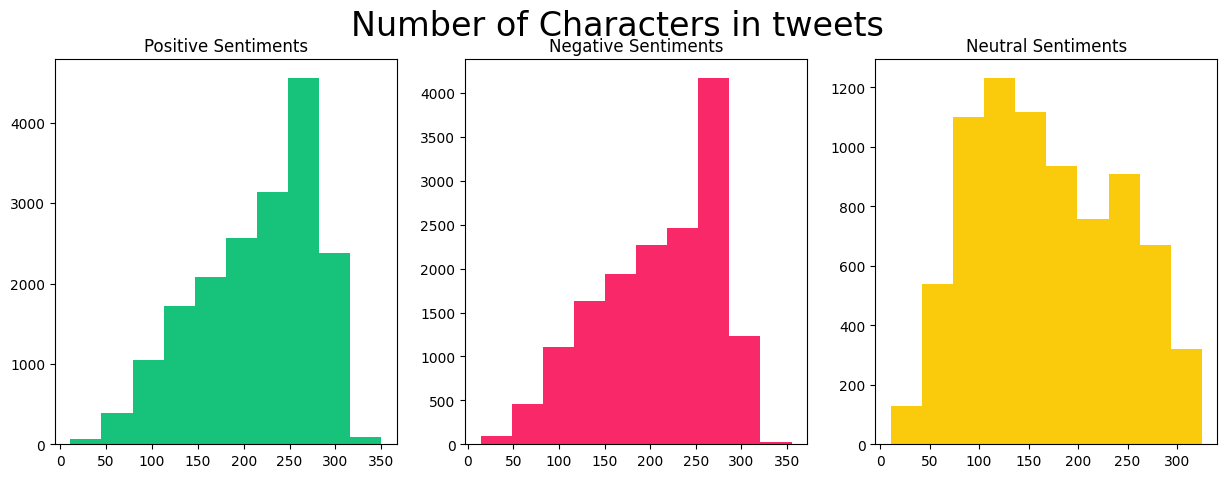

In [99]:
# No of characters in a tweet

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="positive"]['text'].str.len()
ax1.hist(tweet_len, color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="negative"]['text'].str.len()
ax2.hist(tweet_len, color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=data_corona_NLP_train[data_corona_NLP_train['Sentiment']=="netural"]['text'].str.len()
ax3.hist(tweet_len, color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Number of Characters in tweets', fontsize = 24)
plt.show()

In [123]:
# load stop words
stop_word = stopwords.words('english')

In [154]:
# Remove unnecessary words, symbols, worgs, tags
def corpus(target):
    
    # remove urls
    target = re.sub(r'http\S+', " ", target)

    # remove mentions
    target = re.sub(r'@\w+',' ', target)

    # remove hastags
    target = re.sub(r'#\w+', ' ', target)

    # remove digits
    target = re.sub(r'\d+', ' ', target)

    # remove html tags
    target = re.sub('r<.*?>',' ', target)
    
    # remove stop words 
    target = target.split()
    target = " ".join([word for word in target if not word in stop_word])    
      
    return target

In [125]:
data_corona_NLP_train['OriginalTweet'] = data_corona_NLP_train['OriginalTweet'].apply(lambda x: corpus(x))
data_corona_NLP_test['OriginalTweet'] = data_corona_NLP_test['OriginalTweet'].apply(lambda x: corpus(x))

In [155]:
# train['Sentiment'] = train['Sentiment'].map({'positive':2, 'negative':0, 'neutral':1})

from sklearn.preprocessing import LabelEncoder

# Normalize and transform labels between 0 and 1
le = LabelEncoder()
  
# Encode labels in column 'Sentiment'.
data_corona_NLP_train['Sentiment'] = le.fit_transform(data_corona_NLP_train['Sentiment'])
  
data_corona_NLP_train['Sentiment'].unique()

array([1, 2, 0])

In [127]:
data_corona_NLP_train.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet  Sentiment  \
0                                                             1   
1  advice Talk neighbours family exchange phone n...          2   
2  Coronavirus Australia: Woolworths give elderly...          2   
3  My food stock one empty... PLEASE, panic, THER...          2   
4  Me, ready go supermarket outbreak. Not I'm par...          0   

                                                text  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia: Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me, ready to go at supermarket during the #COV...

In [130]:
# Split sentiment groups 
Positive = data_corona_NLP_train[data_corona_NLP_train['Sentiment'] == 2].OriginalTweet
Neutral  = data_corona_NLP_train[data_corona_NLP_train['Sentiment'] == 1].OriginalTweet
Negative = data_corona_NLP_train[data_corona_NLP_train['Sentiment'] == 0].OriginalTweet

(-0.5, 1199.5, 679.5, -0.5)

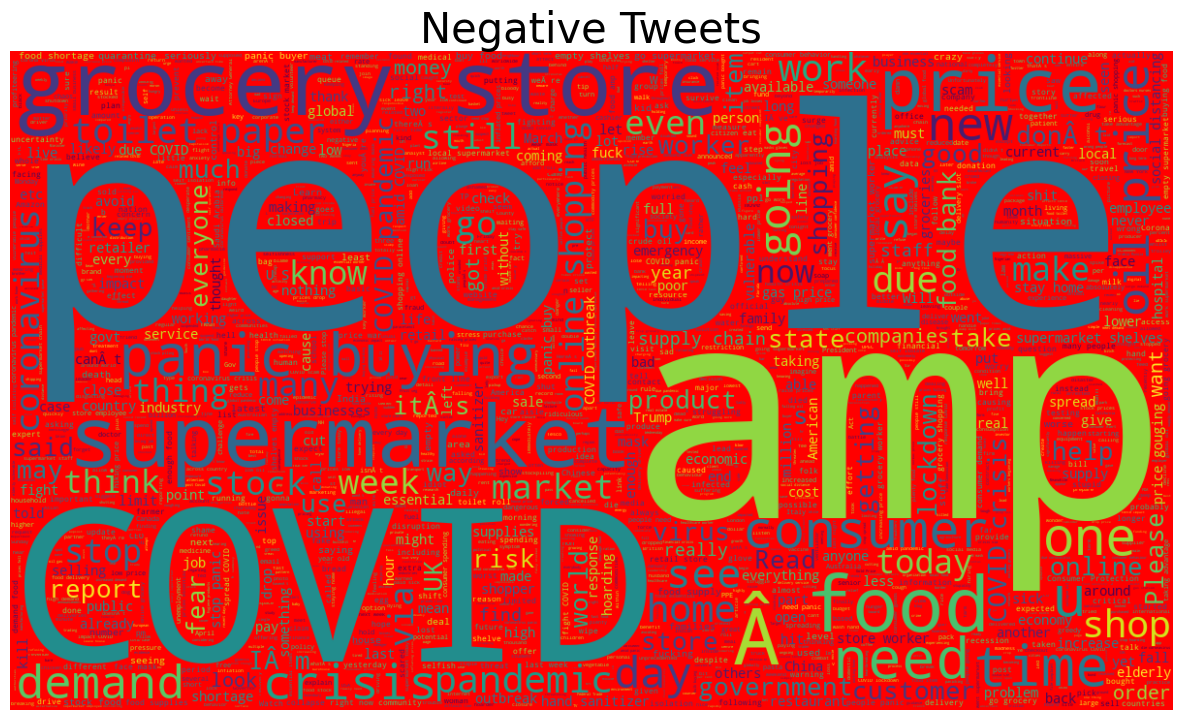

In [166]:
# Wordcloud of Negative Tweets 
plt.figure(figsize = (15,12), facecolor='white')
plt.title('Negative Tweets', fontsize=30)
wordcloud = WordCloud(background_color ='red', min_font_size = 3,  max_words = 3000 , width = 1200 , height = 680).generate(" ".join(Negative))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
#plt.tight_layout(pad = 0) 
#plt.grid(None)

(-0.5, 1199.5, 679.5, -0.5)

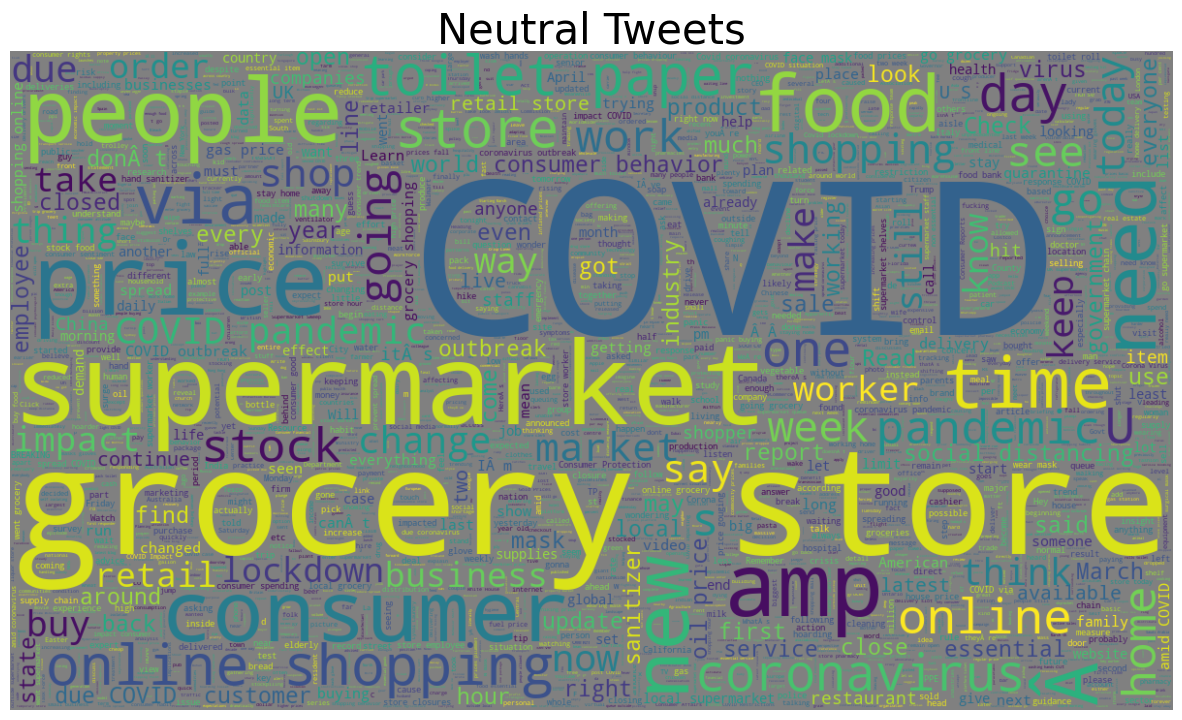

In [167]:
# Wordcould of Neutral Tweets 
plt.figure(figsize = (15,12)) 
plt.title('Neutral Tweets', fontsize=30)
wordcloud = WordCloud(background_color ='grey', min_font_size = 3,  max_words = 3000 , width = 1200 , height = 680).generate(" ".join(Neutral))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
#plt.grid(None)

(-0.5, 1199.5, 679.5, -0.5)

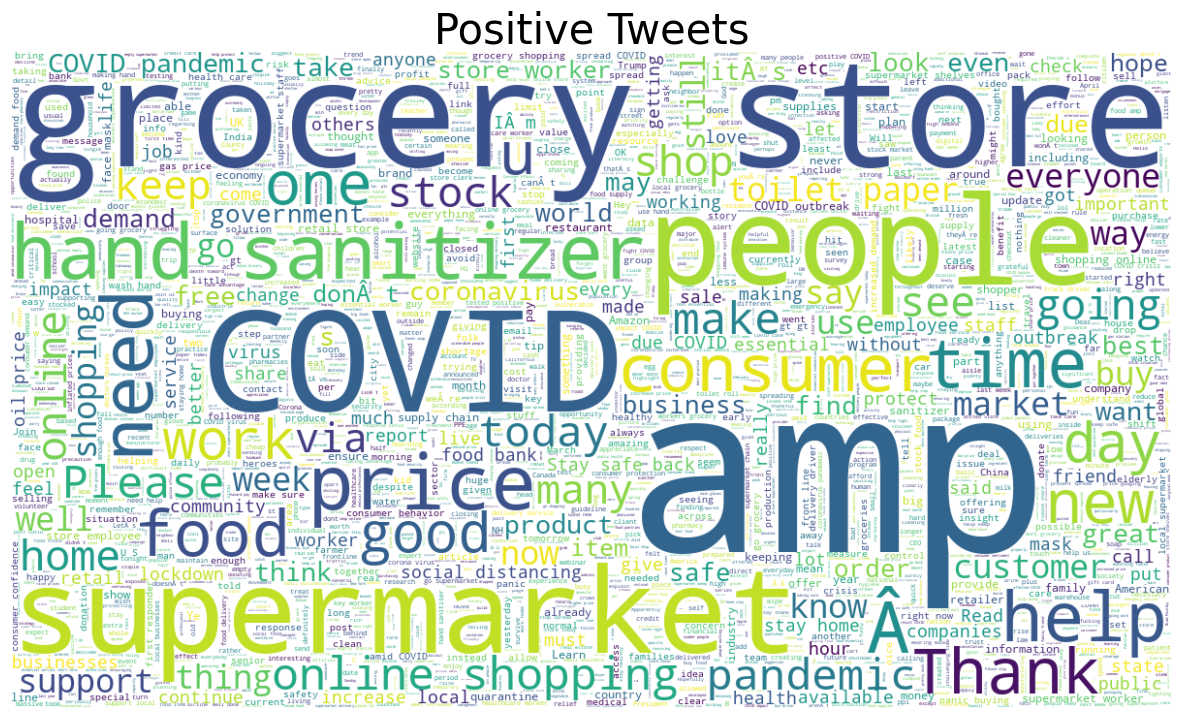

In [169]:
# Wordcould of Positive Tweets 
plt.figure(figsize = (15,12)) 
plt.title('Positive Tweets', fontsize=30)
wordcloud = WordCloud(background_color ='white', min_font_size = 3,  max_words = 3000 , width = 1200 , height = 680).generate(" ".join(Positive))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
#plt.grid(None)

In [218]:
# Get all hashtags

def extract_hash_tags(s):
    hashes = re.findall(r"#(\w+)", s)
    return " ".join(hashes)
original_train_data['hashtags'] = original_train_data['OriginalTweet'].apply(lambda x : extract_hash_tags(x))

In [220]:
allHashTags = list(original_train_data[(data_corona_NLP_train['hashtags'] != None) & (original_train_data['hashtags'] != "")]['hashtags'])
allHashTags = [tag.lower() for tag in allHashTags]
hash_df = dict(Counter(allHashTags))
top_hash_df = pd.DataFrame(list(hash_df.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:20]
top_hash_df.head()

word  count
7            coronavirus   3354
2               covid_19    723
17             covid2019    420
8    coronavirus covid19    349
134  covid19 coronavirus    257

In [238]:
# Hashtag Plot
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

fig = px.bar(x=top_hash_df['word'],y=top_hash_df['count'],
       orientation='v',
       color=top_hash_df['word'],
       text=top_hash_df['count'],
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Words",
                  yaxis_title="Count",
                  title="Top #hashtags in Covid19 Tweets",
                  font=dict(size=17,family="Times New Roman"))
#fig.write_image('top_hashtags.png')
fig.show()

In [233]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
